# Zack's Broker Ratings Revision History

In this notebook, we'll take a look at Zack's *Broker Ratings Revision History* dataset, available on [Quantopian](https://www.quantopian.com/store). This dataset spans 2002 through the current day and provides Analyst Ratings History for Securities.

Update time: Zacks updates this dataset sometime during the first week of each month. In pipeline, your data will be updated close to midnight. So on the 27th, you will have data with a maximum asof_date of the 26th.

## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href='#pipeline'><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.

### Free samples and limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

There is a *free* version of this dataset as well as a paid one. The free sample includes data until 2 months prior to the current date.

To access the most up-to-date values for this data set for trading a live algorithm (as with other partner sets), you need to purchase acess to the full set.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).

Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [2]:
# import the free sample of the dataset
from quantopian.interactive.data.zacks import broker_ratings as dataset

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.timestamp.min()

Timestamp('2002-01-02 00:00:00')

In [4]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset.count()

464669

In [6]:
# Let's see what the data looks like. We'll grab three rows
dataset.tail(3)

,file_prod_date,m_ticker,symbol,comp_name,comp_name_2,exchange,currency_code,rating_cnt_strong_buys,rating_cnt_mod_buys,rating_cnt_holds,rating_cnt_mod_sells,rating_cnt_strong_sells,rating_mean_recom,rating_cnt_with,rating_cnt_without,sid,asof_date,timestamp
0,2016-10-04,AA,AA,ALCOA INC,Alcoa Inc.,NYSE,USD,6.0,3.0,3.0,0.0,1.0,2.2,16.0,3.0,2,2002-01-01,2002-01-02
1,2016-10-04,AAPL,AAPL,APPLE INC,Apple Inc.,NSDQ,USD,1.0,4.0,12.0,0.0,0.0,2.6,19.0,2.0,24,2002-01-01,2002-01-02
2,2016-10-04,ABT,ABT,ABBOTT LABS,Abbott Laboratories,NYSE,USD,9.0,7.0,4.0,0.0,0.0,1.8,21.0,1.0,62,2002-01-01,2002-01-02


Let's go over the columns:
- **file_prod_date**: File production date
- **m_ticker**: Master ticker or trading symbol
- **symbol**: Ticker
- **comp_name**: Company name
- **comp_name_2**: Company name 2
- **exchange**: Exchange traded
- **currency_code**: Currency code
- **rating_cnt_strong_buys**: Number of analysts with a strong buy rating
- **rating_cnt_mod_buys**: Number of analysts with a moderate buy rating
- **rating_cnt_holds**: Number of analysts with a hold rating
- **rating_cnt_mod_sells**: Number of analysts with a moderate sell rating
- **rating_cnt_strong_sells**: Number of analysts with a strong sell rating
- **rating_mean_recom**: Average rating recommendation
- **rating_cnt_with**: Number of analysts with a rating
- **rating_cnt_without**: Number of analysts with no rating
- **asof_date**: Observation date
- **timestamp**: This is our timestamp on when we registered the data.


We've done much of the data processing for you. Fields like `timestamp` and `sid` are standardized across all our Store Datasets, so the datasets are easy to combine. We have standardized the `sid` across all our equity databases.

We can select columns and rows with ease. Below, we'll fetch all rows for Apple (sid 24) and explore the scores a bit with a chart.

In [9]:
aapl_data = dataset_100[dataset_100.symbol == 'AAPL']
aapl = odo(aapl_data, pd.DataFrame)
# suppose we want the rows to be indexed by timestamp.
aapl.index = list(aapl['asof_date'])
aapl.drop('asof_date',1,inplace=True)
aapl[-3:]

,symbol,name,sid,predicted_five_day_log_return,timestamp
2016-10-03,AAPL,APPLE INC,24,0.003,2016-10-04 00:00:00.000000
2016-10-04,AAPL,APPLE INC,24,0.011,2016-10-06 04:01:28.909580
2016-10-05,AAPL,APPLE INC,24,0.021,2016-10-06 04:01:28.909580


<a id='pipeline'></a>

#Pipeline Overview

### Accessing the data in your algorithms & research
The only method for accessing partner data within algorithms running on Quantopian is via the pipeline API. Different data sets work differently but in the case of this data, you can add this data to your pipeline as follows:

In [12]:
# Import necessary Pipeline modules
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import AverageDollarVolume

In [9]:
# For use in your algorithms
# Using the full/sample paid dataset in your pipeline algo
from quantopian.pipeline.data.zacks import broker_ratings

Now that we've imported the data, let's take a look at which fields are available for each dataset.

You'll find the dataset, the available fields, and the datatypes for each of those fields.

In [10]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

for data in (broker_ratings,):
    _print_fields(data)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: broker_ratings

Fields:
comp_name - object
exchange - object
currency_code - object
symbol - object
m_ticker - object
rating_mean_recom - float64
rating_cnt_without - float64
rating_cnt_strong_buys - float64
asof_date - datetime64[ns]
rating_cnt_mod_buys - float64
rating_cnt_holds - float64
file_prod_date - datetime64[ns]
rating_cnt_mod_sells - float64
comp_name_2 - object
rating_cnt_strong_sells - float64
rating_cnt_with - float64


---------------------------------------------------



Now that we know what fields we have access to, let's see what this data looks like when we run it through Pipeline.


This is constructed the same way as you would in the backtester. For more information on using Pipeline in Research view this thread:
https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

In [13]:
# Let's see what this data looks like when we run it through Pipeline
# This is constructed the same way as you would in the backtester. For more information
# on using Pipeline in Research view this thread:
# https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

columns = {'Strong Sells': broker_ratings.rating_cnt_strong_sells.latest,
           'Strong Buys': broker_ratings.rating_cnt_strong_buys.latest}
pipe = Pipeline(columns=columns, screen=broker_ratings.rating_cnt_mod_sells.latest.notnan())

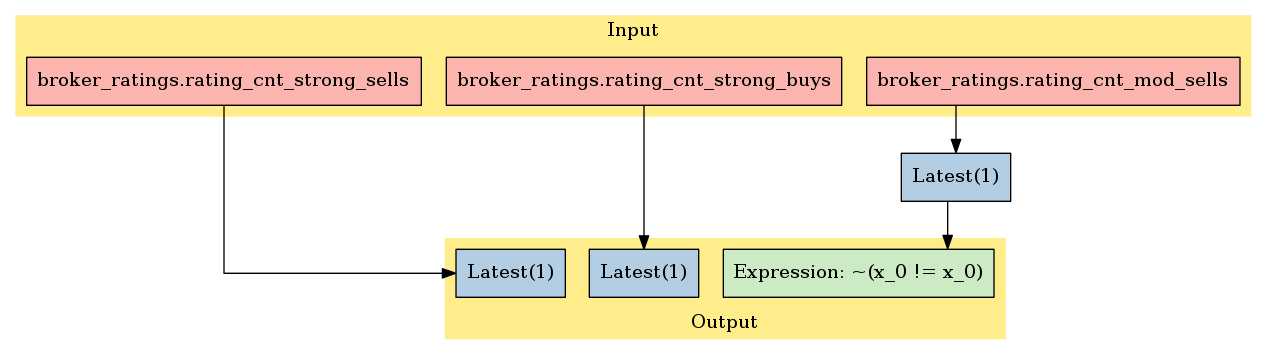

In [14]:
# The show_graph() method of pipeline objects produces a graph to show how it is being calculated.
pipe.show_graph(format='png')

In [15]:
# run_pipeline will show the output of your pipeline
pipe_output = run_pipeline(pipe, start_date='2013-11-01', end_date='2013-11-25')
pipe_output

Strong Buys  Strong Sells
2013-11-01 00:00:00+00:00 Equity(2 [AA])                2.0           4.0
                          Equity(24 [AAPL])            27.0           0.0
                          Equity(31 [ABAX])             1.0           0.0
                          Equity(39 [DDC])              2.0           0.0
                          Equity(52 [ABM])              1.0           0.0
                          Equity(53 [ABMD])             4.0           1.0
                          Equity(62 [ABT])              9.0           0.0
                          Equity(64 [ABX])              2.0           0.0
                          Equity(66 [AB])               1.0           0.0
                          Equity(67 [ADSK])             5.0           0.0
                          Equity(69 [ACAT])             2.0           0.0
                          Equity(70 [VBF])              0.0           0.0
                          Equity(76 [TAP])              4.0           0.0
                          Equity(84 [ACET])             0.0           0.0
                          Equity(86 [ACG])              0.0           0.0
                          Equity(99 [ACO])              0.0           0.0
                          Equity(100 [IEP])             1.0           0.0
                          Equity(106 [ACU])             0.0           0.0
                          Equity(110 [ACXM])            2.0           1.0
                          Equity(112 [ACY])             0.0           0.0
                          Equity(114 [ADBE])            9.0           0.0
                          Equity(117 [AEY])             0.0           0.0
                          Equity(122 [ADI])            11.0           0.0
                          Equity(128 [ADM])             3.0           0.0
                          Equity(149 [ADX])             0.0           0.0
                          Equity(153 [AE])              0.0           0.0
                          Equity(154 [AEM])             4.0           0.0
                          Equity(157 [AEG])             0.0           0.0
                          Equity(161 [AEP])             7.0           0.0
                          Equity(162 [AEPI])            0.0           0.0
...                                                     ...           ...
2013-11-25 00:00:00+00:00 Equity(45505 [MONT])          3.0           0.0
                          Equity(45506 [PINC])          4.0           0.0
                          Equity(45520 [VMEM])          1.0           0.0
                          Equity(45521 [RNG])           3.0           0.0
                          Equity(45522 [ENZY])          3.0           0.0
                          Equity(45526 [PEGI])          2.0           0.0
                          Equity(45538 [CNHI])          0.0           0.0
                          Equity(45557 [RMAX])          2.0           0.0
                          Equity(45558 [BURL])          5.0           0.0
                          Equity(45559 [ESRT])          1.0           0.0
                          Equity(45577 [OCIP])          2.0           0.0
                          Equity(45578 [CHMI])          3.0           0.0
                          Equity(45579 [PBPB])          1.0           0.0
                          Equity(45617 [QTS])           3.0           0.0
                          Equity(45618 [AR])            8.0           0.0
                          Equity(45619 [LDRH])          4.0           0.0
                          Equity(45640 [WNRL])          1.0           0.0
                          Equity(45641 [CXP])           1.0           0.0
                          Equity(45642 [SGM])           2.0           0.0
                          Equity(45643 [MGNX])          3.0           0.0
                          Equity(45656 [GLPI])          1.0           0.0
                          Equity(45667 [VEEV])          3.0           0.0
                          Equity(45668 [PAGP])      

Now you can take that and begin to use it as a building block for your algorithms, for more examples on how to do that you can visit our <a href='https://www.quantopian.com/posts/pipeline-factor-library-for-data'>data pipeline factor library</a>